In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'combine_data20-22.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [3]:
import copy
data_df= copy.deepcopy(data)

In [4]:
data_df.shape

(12456, 14)

In [5]:
data_df= data_df[['Date', 'Location', 'Item', 'Quantity']]

### Method-1

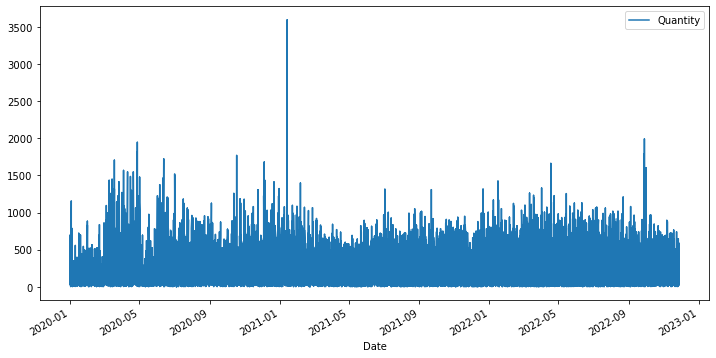

In [236]:
from matplotlib import pyplot
ax = data_df.plot(x='Date', y='Quantity', figsize=(12,6))

In [237]:
data_df['Location'].unique()

array(['LAKEWOOD', 'HAYWARD', 'FREMONT', 'S SAN FRANCISCO BUS CTR',
       'RICHMOND CA'], dtype=object)

In [238]:
data_df['Item'].unique()

array(['DRUMSTICKS NNNN', 'CHICKEN XXXXX - O', 'FILLET QQQQ',
       'BEEF OOOO - GT'], dtype=object)

In [239]:
data_df.head()

,Date,Location,Item,Quantity
0,2020-01-02,LAKEWOOD,DRUMSTICKS NNNN,172.55461
1,2020-01-02,LAKEWOOD,CHICKEN XXXXX - O,45.85170
2,2020-01-02,HAYWARD,FILLET QQQQ,60.41915
3,2020-01-02,LAKEWOOD,FILLET QQQQ,36.49069
4,2020-01-02,HAYWARD,CHICKEN XXXXX - O,90.86774


In [240]:
data_df.tail()

,Date,Location,Item,Quantity
12451,2022-11-27,RICHMOND CA,DRUMSTICKS NNNN,588.18604
12452,2022-11-27,LAKEWOOD,CHICKEN XXXXX - O,84.08014
12453,2022-11-27,FREMONT,DRUMSTICKS NNNN,409.13178
12454,2022-11-27,FREMONT,FILLET QQQQ,52.02894
12455,2022-11-27,LAKEWOOD,DRUMSTICKS NNNN,201.62792


In [16]:
data_df_new = data_df.loc[data_df['Date'] <= '2022-04-30']

In [18]:
data_df_new.head()

,Date,Location,Item,Quantity
0,2020-01-02,LAKEWOOD,DRUMSTICKS NNNN,172.55461
1,2020-01-02,LAKEWOOD,CHICKEN XXXXX - O,45.85170
2,2020-01-02,HAYWARD,FILLET QQQQ,60.41915
3,2020-01-02,LAKEWOOD,FILLET QQQQ,36.49069
4,2020-01-02,HAYWARD,CHICKEN XXXXX - O,90.86774


In [19]:
data_df_new.tail()

,Date,Location,Item,Quantity
9864,2022-04-30,RICHMOND CA,FILLET QQQQ,77.64081
9865,2022-04-30,RICHMOND CA,CHICKEN XXXXX - O,29.26210
9866,2022-04-30,RICHMOND CA,DRUMSTICKS NNNN,780.25251
9867,2022-04-30,FREMONT,CHICKEN XXXXX - O,24.70952
9868,2022-04-30,FREMONT,FILLET QQQQ,6.92992


In [63]:
data_df_new.shape

(781, 1)

In [21]:
data_df_new= data_df_new[(data_df_new['Location']=='LAKEWOOD') & (data_df_new['Item']== 'DRUMSTICKS NNNN')]

In [22]:
data_df_new.head()

,Date,Location,Item,Quantity
0,2020-01-02,LAKEWOOD,DRUMSTICKS NNNN,172.55461
14,2020-01-03,LAKEWOOD,DRUMSTICKS NNNN,197.22689
31,2020-01-04,LAKEWOOD,DRUMSTICKS NNNN,257.69748
37,2020-01-05,LAKEWOOD,DRUMSTICKS NNNN,429.74791
49,2020-01-06,LAKEWOOD,DRUMSTICKS NNNN,269.05040


In [23]:
data_df_new= data_df_new.drop(['Location', 'Item'], axis=1)

In [12]:
train_dates = pd.to_datetime(data_df1['Date'])

In [24]:
data_df_new = data_df_new.set_index('Date')

In [25]:
data_df_new.shape

(781, 1)

In [16]:
# len(data_df2)

In [71]:
a= int(len(data_df_new)*0.70)

In [72]:
a

546

In [73]:
#Splitting 

train,test = data_df_new[:a], data_df_new[a:]

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

MinMaxScaler()

In [75]:

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [76]:

## Use TimeSeriestrain_generator to generate data in sequences.
from keras.preprocessing.sequence import TimeseriesGenerator


seq_size = 7  ## number of steps (lookback)
n_features = 1 ## number of features. This dataset is univariate so it is 1

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator)) 




Total number of samples in the original training data =  546
Total number of samples in the generated data =  539


In [77]:
#Check data shape from generator
x,y = train_generator[10]  #Check train_generator
#Takes 7 days as x and 8th day as y (for seq_size=7)

In [78]:
# x

In [79]:
# y

In [80]:
#Also generate test data
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7
#Check data shape from generator
x,y = test_generator[0]

Total number of samples in the original training data =  235
Total number of samples in the generated data =  228


In [81]:
# x

In [82]:
# y

#### Model LSTM

In [83]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

#Define Model 
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=30, steps_per_epoch=10)

Epoch 1/30


C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_16988\2364764661.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


10/10 [==============================] - 3s 70ms/step - loss: 0.0093 - val_loss: 0.0272
Epoch 2/30
10/10 [==============================] - 0s 48ms/step - loss: 0.0069 - val_loss: 0.0140
Epoch 3/30
10/10 [==============================] - 0s 50ms/step - loss: 0.0099 - val_loss: 0.0110
Epoch 4/30
10/10 [==============================] - 0s 52ms/step - loss: 0.0083 - val_loss: 0.0116
Epoch 5/30
10/10 [==============================] - 0s 51ms/step - loss: 0.0078 - val_loss: 0.0116
Epoch 6/30
10/10 [==============================] - 0s 48ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 7/30
10/10 [==============================] - 0s 51ms/step - loss: 0.0089 - val_loss: 0.0136
Epoch 8/30
10/10 [==============================] - 1s 61ms/step - loss: 0.0020 - val_loss: 0.0157
Epoch 9/30
10/10 [==============================] - 0s 52ms/step - loss: 0.0085 - val_loss: 0.0146
Epoch 10/30
10/10 [==============================] - 1s 56ms/step - loss: 0.0075 - val_loss: 0.0114
Epoch 11/30
10/10 [=

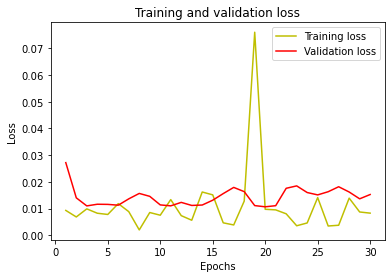

In [85]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [87]:
## Predict future, beyond test dates
future = 7 #Days
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [88]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

In [89]:
# rescaled_prediction

In [90]:
time_series = test.index  #Get dates for test data

In [91]:
#Add new dates for the forecast period
for k in range(0, future):
    time_series = time_series.append(time_series[-1:] + pd.DateOffset(1))

In [92]:
#Create a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_confirmed","predicted"], index=time_series)

In [93]:
df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_confirmed"] = test["Quantity"]

<AxesSubplot:title={'center':'Predictions for next 7 days'}, xlabel='Date'>

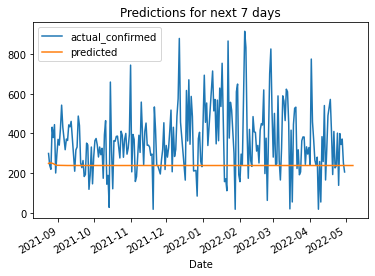

In [94]:
#Plot
df_forecast.plot(title="Predictions for next 7 days")

In [95]:
trainPredict = model.predict(train_generator)
train_inverse = scaler.inverse_transform(train_scaled)

539/539 [==============================] - 1s 2ms/step


In [96]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
trainScore = mean_squared_error(train_inverse[seq_size:], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))

trainScore = math.sqrt(mean_squared_error(train_inverse[seq_size:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 96615.81 MSE
Train Score: 310.83 RMSE


In [97]:
testPredict = model.predict(test_generator)
test_inverse = scaler.inverse_transform(test_scaled)

228/228 [==============================] - 0s 2ms/step


In [98]:
# calculate root mean squared error

testScore = mean_squared_error(test_inverse[seq_size:], testPredict[:,0])
print('Train Score: %.2f MSE' % (testScore))

testScore = math.sqrt(mean_squared_error(test_inverse[seq_size:], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (testScore))

Train Score: 160030.62 MSE
Train Score: 400.04 RMSE


## Model-2

In [130]:
df_new = data_df.loc[data_df['Date'] <= '2022-04-01']

In [131]:
# df_new.head()

In [132]:
df_new.tail()

,Date,Location,Item,Quantity
9537,2022-04-01,FREMONT,CHICKEN XXXXX - O,5.35058
9538,2022-04-01,FREMONT,DRUMSTICKS NNNN,962.73737
9539,2022-04-01,RICHMOND CA,CHICKEN XXXXX - O,25.62103
9540,2022-04-01,RICHMOND CA,DRUMSTICKS NNNN,524.80810
9541,2022-04-01,FREMONT,FILLET QQQQ,42.79973


In [133]:
# data_df_new = df_new[(df_new['Location']=='LAKEWOOD') & (df_new['Item']== 'DRUMSTICKS NNNN')]

In [134]:
#S SAN FRANCISCO BUS CTR  ,  ['BEEF OOOO - GT'

data_df2 = df_new[(df_new['Location']=='S SAN FRANCISCO BUS CTR') & (df_new['Item']== 'BEEF OOOO - GT')]

In [135]:
data_df2.head()

,Date,Location,Item,Quantity
6,2020-01-02,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,99.82330
22,2020-01-03,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,105.91968
33,2020-01-04,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,60.23292
46,2020-01-06,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,59.97591
58,2020-01-07,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,100.04016


In [136]:
data_df2 = data_df2.drop(['Location', 'Item'], axis=1)

In [137]:
data_df2= data_df2.set_index('Date')

In [138]:
data_df2

,Quantity
Date,
2020-01-02,99.82330
2020-01-03,105.91968
2020-01-04,60.23292
2020-01-06,59.97591
2020-01-07,100.04016
...,...
2022-03-28,254.41220
2022-03-29,249.70632
2022-03-30,353.75465


In [139]:
data_df2.shape

(632, 1)

In [140]:
a= int(len(data_df2)*0.70)
a

442

In [141]:
#Splitting 

train,test = data_df2[:a], data_df2[a:]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [142]:
train.shape

(442, 1)

In [143]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past=seq_size = 7  # Number of past days we want to use to predict the future.
n_features = 1 ## number of features. This dataset is univariate so it is 1

#Reformat input data into a shape: (n_samples x timesteps x n_features)

for i in range(n_past, len(train_scaled) - n_future +1):
    trainX.append(train_scaled[i - n_past:i, 0:train.shape[1]])
    trainY.append(train_scaled[i + n_future - 1:i + n_future, 0])

In [144]:
trainX, trainY = np.array(trainX), np.array(trainY)


In [145]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (435, 7, 1).
trainY shape == (435, 1).


In [146]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 7, 64)             16896     
                                                                 
 lstm_16 (LSTM)              (None, 7, 64)             33024     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 62,369
Trainable params: 62,369
Non-trainable params: 0
_________________________________________________________________


In [147]:
# model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=((seq_size, n_features)), return_sequences=True))
# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dense(1))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [148]:
# # history = model.fit_generator(train_generator, 
#                               validation_data=test_generator, 
#                               epochs=30, steps_per_epoch=10)



history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
22/22 [==============================] - 3s 23ms/step - loss: 0.0424 - val_loss: 0.0278
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.0250
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0215 - val_loss: 0.0240
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0247
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0215 - val_loss: 0.0230
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: 0.0243
Epoch 7/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0221 - val_loss: 0.0243
Epoch 8/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0217 - val_loss: 0.0233
Epoch 9/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0242
Epoch 10/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.0241
Epoch 11/30
22/22 

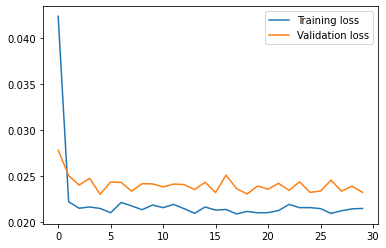

In [149]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [150]:
# n_future = 1   # Number of days we want to look into the future based on the past days.
# n_past = 5  # Number of past days we want to use to predict the future.


n_past= seq_size= 9
n_days_for_prediction = 180  #let us predict past 12 days

In [151]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [152]:
# train_dates = pd.to_datetime(data_df2['Date'])
time_series = test.index

In [153]:
predict_period_dates = pd.date_range(list(time_series)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-03-23 00:00:00', freq='C'), Timestamp('2022-03-24 00:00:00', freq='C'), Timestamp('2022-03-25 00:00:00', freq='C'), Timestamp('2022-03-28 00:00:00', freq='C'), Timestamp('2022-03-29 00:00:00', freq='C'), Timestamp('2022-03-30 00:00:00', freq='C'), Timestamp('2022-03-31 00:00:00', freq='C'), Timestamp('2022-04-01 00:00:00', freq='C'), Timestamp('2022-04-04 00:00:00', freq='C'), Timestamp('2022-04-05 00:00:00', freq='C'), Timestamp('2022-04-06 00:00:00', freq='C'), Timestamp('2022-04-07 00:00:00', freq='C'), Timestamp('2022-04-08 00:00:00', freq='C'), Timestamp('2022-04-11 00:00:00', freq='C'), Timestamp('2022-04-12 00:00:00', freq='C'), Timestamp('2022-04-13 00:00:00', freq='C'), Timestamp('2022-04-14 00:00:00', freq='C'), Timestamp('2022-04-15 00:00:00', freq='C'), Timestamp('2022-04-18 00:00:00', freq='C'), Timestamp('2022-04-19 00:00:00', freq='C'), Timestamp('2022-04-20 00:00:00', freq='C'), Timestamp('2022-04-21 00:00:00', freq='C'), Timestamp('2022-04-22 00:00:00'

In [154]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

6/6 [==============================] - 1s 3ms/step


In [155]:
# Model Prediction


prediction.shape

(180, 1)

In [156]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)[:,0]

In [157]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Quantity':rescaled_prediction})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [158]:
df_forecast

,Date,Quantity
0,2022-03-23,157.118759
1,2022-03-24,161.660828
2,2022-03-25,162.719147
3,2022-03-28,156.187027
4,2022-03-29,158.677078
...,...,...
175,2022-12-02,170.521820
176,2022-12-05,173.157227
177,2022-12-06,179.016357
178,2022-12-07,171.834335


In [159]:
#reset index
data_df3= data_df2.reset_index()

In [160]:

original = data_df3[['Date', 'Quantity']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-01-02']

In [161]:
# original= original.tail(90)

In [162]:
# original=original.head(85)

C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


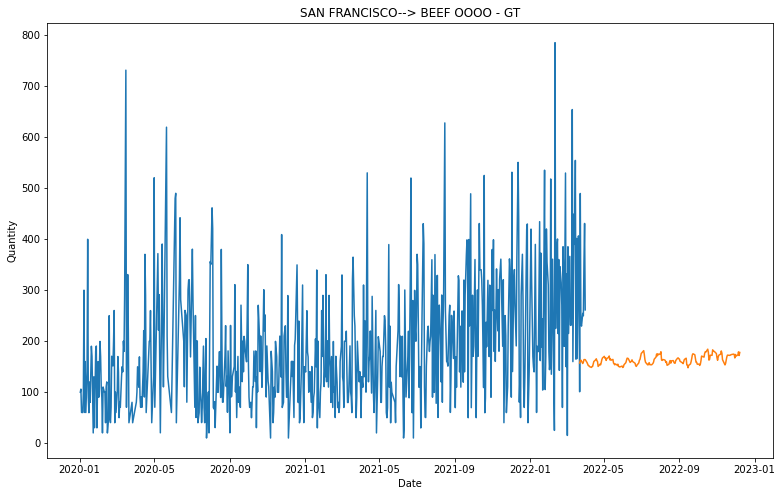

In [163]:

plt.figure(figsize=(13,8)) 
lineplt= sns.lineplot(original['Date'], original['Quantity'])
sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
lineplt.set(title = 'SAN FRANCISCO--> BEEF OOOO - GT')
plt.show()

In [164]:
trainPredict = model.predict(trainX)
train_inverse = scaler.inverse_transform(train_scaled)

14/14 [==============================] - 0s 3ms/step


In [165]:
trainPredict.shape

(435, 1)

In [166]:
train_inverse.shape

(442, 1)

In [167]:
n_past=7
train_inverse[n_past:].shape

(435, 1)

In [168]:
# trainPredict[:,0].shape

In [169]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
# n_past=9

trainScore = mean_squared_error(train_inverse[n_past:], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))

trainScore = math.sqrt(mean_squared_error(train_inverse[n_past:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 36962.73 MSE
Train Score: 192.26 RMSE


In [170]:
trainY.shape

(435, 1)

In [171]:
#Also generate test data
# test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
# print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
# print("Total number of samples in the generated data = ", len(test_generator)) # 7
# print("Total number of samples in the shifting data = ", len(trainY)) # 7

In [172]:
scaler.fit(test) 

MinMaxScaler()

In [173]:


testPredict = model.predict(test)
test_inverse = scaler.inverse_transform(test_scaled)

6/6 [==============================] - 0s 2ms/step


In [174]:
test_inverse[:].shape

(190, 1)

In [175]:
testPredict[:,0].shape

(190,)

In [176]:
# calculate root mean squared error

testScore = mean_squared_error(test_inverse[:], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

testScore = math.sqrt(mean_squared_error(test_inverse[:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 91438.53 MSE
Test Score: 302.39 RMSE


### All Location and items 

In [177]:
df_new = data_df.loc[data_df['Date'] <= '2022-04-01']

In [178]:
df_new.tail()

,Date,Location,Item,Quantity
9537,2022-04-01,FREMONT,CHICKEN XXXXX - O,5.35058
9538,2022-04-01,FREMONT,DRUMSTICKS NNNN,962.73737
9539,2022-04-01,RICHMOND CA,CHICKEN XXXXX - O,25.62103
9540,2022-04-01,RICHMOND CA,DRUMSTICKS NNNN,524.80810
9541,2022-04-01,FREMONT,FILLET QQQQ,42.79973


In [179]:
data_df= df_new.copy()

In [180]:
for i in data_df["Location"].unique():
    df= data_df[data_df['Location']==i]
    print(i, " , ", list(df['Item'].unique()))

LAKEWOOD  ,  ['DRUMSTICKS NNNN', 'CHICKEN XXXXX - O', 'FILLET QQQQ']
HAYWARD  ,  ['FILLET QQQQ', 'CHICKEN XXXXX - O', 'DRUMSTICKS NNNN']
FREMONT  ,  ['FILLET QQQQ', 'CHICKEN XXXXX - O', 'DRUMSTICKS NNNN']
S SAN FRANCISCO BUS CTR  ,  ['BEEF OOOO - GT', 'DRUMSTICKS NNNN']
RICHMOND CA  ,  ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ']


In [181]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [183]:
for i in data_df['Location'].unique():
    df= data_df[data_df['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]

        item_data= item_data.drop(['Location', 'Item'], axis=1)
        train_dates = pd.to_datetime(item_data['Date'])  #collecting date 
        item_data = item_data.set_index('Date')
#         print(item_data)
        
        #Modelling 
        
        #Splitting 
        a= int(len(item_data)*0.75)
        train,test = item_data[:a], item_data[a:]
        
        #COnverting into same scale 
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(train) 
        
        #Transforming train and test 
        train_scaled = scaler.transform(train)
        test_scaled = scaler.transform(test)
        
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []

        n_future = 1   # Number of days we want to look into the future based on the past days.
        n_past=seq_size = 7  # Number of past days we want to use to predict the future.
        n_features = 1 ## number of features. This dataset is univariate so it is 1

        #Reformat input data into a shape: (n_samples x timesteps x n_features)

        for num in range(n_past, len(train_scaled) - n_future +1):
            trainX.append(train_scaled[num - n_past:num, 0:train.shape[1]])
            trainY.append(train_scaled[num + n_future - 1:num + n_future, 0])
        
        #Converting to Numpy format
        trainX, trainY = np.array(trainX), np.array(trainY)
        
#         print(f'Location: {i} and  Item: {j}')
        
#         print('trainX shape == {}.'.format(trainX.shape))
#         print('trainY shape == {}.'.format(trainY.shape))
        
#         print("\n")
        print(f"LSTM Archtitecture {i}--> {j}")
        
        model = Sequential()
        model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
        model.add(LSTM(64, activation='relu', return_sequences=True))
        model.add(LSTM(32, activation='relu', return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mse')
#         model.summary()
#         print("\n")
        print(f"Model Training: {i}--> {j}")
        history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)
        
        #Plotting traning and validation curve 
        print("\n")
        print(f"Plot for: {i}--> {j}")
        title = i+"-->"+j
        
#         ax.set_title(title)
#         plt.plot(history.history['loss'], label='Training loss')
#         plt.plot(history.history['val_loss'], label='Validation loss')
#         ax.set_ylabel('Quantity')
#         ax.set_xlabel('Date')
#         plt.legend()
        
        print("\n")
        
        print(f"Model Forecasting initated: {i}--> {j}")

        n_past= seq_size= 9        #Number of past days we want to use to predict the future.
        n_days_for_prediction = 180     #let us predict past 12 days
        
        time_series = test.index  #Get dates for test data
        
        #Creating date time periods for next 90 days 
        predict_period_dates = pd.date_range(list(time_series)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
        
        print(f"Model prediction initiated : {i}--> {j}")
        #Make prediction
        prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
        
        ### Inverse transform to before scaling so we get actual numbers
        rescaled_prediction = scaler.inverse_transform(prediction)[:,0]
        
        print(f"Model prediction completed : {i}--> {j}")
        # Convert timestamp to date
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        
        print(f"Storing prediction into DataFrame : {i}--> {j}")
        print("\n")
        
        #Creating/saving prediction into dataframe 
        df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Pred_Quantity':rescaled_prediction})
        df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        
        
        
        #reset index
        data_df2= item_data.reset_index()
        
        original = data_df2[['Date', 'Quantity']]
        original['Date']=pd.to_datetime(original['Date'])
        original = original.loc[original['Date'] >= '2020-01-02']
        
        original= original.tail(90)
        
#         print("\n")
        print(f"Plotting prediction with original data : {i}--> {j}")
        
#         plt.figure(figsize=(10,10)) 
#         sns.lineplot(original['Date'], original['Quantity'])
#         sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
#         print(f"Model Forecasting complted  : {i}--> {j}")
   
        print("\n")
        print(f"Calculating MSE and RMSE : {i}--> {j}")
        #Prediction testing
        trainPredict = model.predict(trainX)
        train_inverse = scaler.inverse_transform(train_scaled)
        
        import math
        from sklearn.metrics import mean_squared_error
        n_past1=7

        MSE_Score = mean_squared_error(train_inverse[n_past1:], trainPredict[:,0])
        print(f'Train Score {i}-{j}: %.2f MSE' % (MSE_Score))

        RMSE_Score = math.sqrt(mean_squared_error(train_inverse[n_past1:], trainPredict[:,0]))
        print(f'Train Score {i}-{j}: %.2f RMSE' % (RMSE_Score))
        
        #Saving Results 
        df_forecast['Location']= i
        df_forecast['Item']=j
        
        print("\n")
        print(f'Writing predicted results of {i} and {j}')
        predction_output = "ModelOut\All_out\out\Output -" +i+"-"+j+".xlsx"
        df_forecast.to_excel(predction_output, index= False)
        
        col_names =  ['MSE_Score', 'RMSE_Score']
        Error_matric= pd.DataFrame(columns = col_names)
        
        my_out = {'MSE_Score': MSE_Score, 'RMSE_Score': RMSE_Score}
        Error_matric.loc[len(Error_matric)] = my_out 
        
        Error_matric['Location']=i
        Error_matric['Item']=j
        
        print(f'Writing error matrices of {i} and {j}')
        print("\n")
        Error_output = "ModelOut\All_out\error\Output_Error -" +i+"-"+j+".xlsx"
        Error_matric.to_excel(Error_output, index= False)
        
        
        

LSTM Archtitecture LAKEWOOD--> DRUMSTICKS NNNN
Model Training: LAKEWOOD--> DRUMSTICKS NNNN
Epoch 1/30
28/28 [==============================] - 4s 19ms/step - loss: 0.0187 - val_loss: 0.0052
Epoch 2/30
28/28 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0055
Epoch 3/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0070
Epoch 4/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0055
Epoch 5/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 6/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0052
Epoch 7/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0099 - val_loss: 0.0059
Epoch 8/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0061
Epoch 9/30
28/28 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.0052
Epoch 10/30
28/28 [=======

24/24 [==============================] - 0s 10ms/step - loss: 0.0281 - val_loss: 0.0135
Epoch 14/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0278 - val_loss: 0.0122
Epoch 15/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0282 - val_loss: 0.0124
Epoch 16/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0281 - val_loss: 0.0127
Epoch 17/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0276 - val_loss: 0.0140
Epoch 18/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0290 - val_loss: 0.0123
Epoch 19/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0136
Epoch 20/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0282 - val_loss: 0.0132
Epoch 21/30
24/24 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0124
Epoch 22/30
24/24 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0134
Epoch 23/30
24/24 [=

29/29 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0074
Epoch 26/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0069
Epoch 27/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0221 - val_loss: 0.0070
Epoch 28/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0226 - val_loss: 0.0074
Epoch 29/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0078
Epoch 30/30
29/29 [==============================] - 0s 9ms/step - loss: 0.0220 - val_loss: 0.0070


Plot for: FREMONT--> DRUMSTICKS NNNN


Model Forecasting initated: FREMONT--> DRUMSTICKS NNNN
Model prediction initiated : FREMONT--> DRUMSTICKS NNNN
6/6 [==============================] - 1s 4ms/step
Model prediction completed : FREMONT--> DRUMSTICKS NNNN
Storing prediction into DataFrame : FREMONT--> DRUMSTICKS NNNN


Plotting prediction with original data : FREMONT--> DRUMSTICKS NNNN


Calculating MSE and RMSE

6/6 [==============================] - 0s 4ms/step
Model prediction completed : RICHMOND CA--> DRUMSTICKS NNNN
Storing prediction into DataFrame : RICHMOND CA--> DRUMSTICKS NNNN


Plotting prediction with original data : RICHMOND CA--> DRUMSTICKS NNNN


Calculating MSE and RMSE : RICHMOND CA--> DRUMSTICKS NNNN
19/19 [==============================] - 0s 3ms/step
Train Score RICHMOND CA-DRUMSTICKS NNNN: 415851.05 MSE
Train Score RICHMOND CA-DRUMSTICKS NNNN: 644.87 RMSE


Writing predicted results of RICHMOND CA and DRUMSTICKS NNNN
Writing error matrices of RICHMOND CA and DRUMSTICKS NNNN


LSTM Archtitecture RICHMOND CA--> FILLET QQQQ
Model Training: RICHMOND CA--> FILLET QQQQ
Epoch 1/30
25/25 [==============================] - 4s 36ms/step - loss: 0.0838 - val_loss: 0.0170
Epoch 2/30
25/25 [==============================] - 0s 9ms/step - loss: 0.0229 - val_loss: 0.0172
Epoch 3/30
25/25 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0174
Epoch 4/30
25/25 [=

In [10]:
##combining output and error into one. 

In [185]:
import pandas as pd
import os
import glob

In [186]:
# use glob to get all the csv files
# in the folder
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\out\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))
        

In [187]:
len(out_files)

14

In [188]:
dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df=pd.concat(dfs, ignore_index=True)

In [189]:
df

,Date,Pred_Quantity,Location,Item
0,2022-03-10,79.181770,FREMONT,CHICKEN XXXXX - O
1,2022-03-11,85.553757,FREMONT,CHICKEN XXXXX - O
2,2022-03-14,89.808716,FREMONT,CHICKEN XXXXX - O
3,2022-03-15,91.749397,FREMONT,CHICKEN XXXXX - O
4,2022-03-16,80.073799,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...
2515,2022-12-02,165.987442,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2516,2022-12-05,165.385452,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2517,2022-12-06,165.856018,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2518,2022-12-07,165.887741,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [190]:
df.to_excel('Output_all_LSTM.xlsx', index=False)

In [191]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\error\\'
error_files = glob.glob(os.path.join(path, "*.xlsx"))

len(error_files)

dfs_err= []


for f in error_files:
    dfs_err.append(pd.read_excel(f))
dfs_err=pd.concat(dfs_err, ignore_index=True)

In [192]:
dfs_err

,MSE_Score,RMSE_Score,Location,Item
0,9191.175148,95.870617,FREMONT,CHICKEN XXXXX - O
1,385216.698263,620.658278,FREMONT,DRUMSTICKS NNNN
2,3353.686478,57.911022,FREMONT,FILLET QQQQ
3,5569.723620,74.630581,HAYWARD,CHICKEN XXXXX - O
4,377199.489108,614.165685,HAYWARD,DRUMSTICKS NNNN
5,4704.532302,68.589593,HAYWARD,FILLET QQQQ
6,2859.347922,53.472871,LAKEWOOD,CHICKEN XXXXX - O
7,98008.573550,313.063210,LAKEWOOD,DRUMSTICKS NNNN
8,2085.839899,45.670996,LAKEWOOD,FILLET QQQQ
9,9852.148757,99.257991,RICHMOND CA,CHICKEN XXXXX - O


In [193]:
dfs_err.to_excel('Error_Output_all_LSTM.xlsx', index=False)

### Understock and overstock. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'combine_data20-22.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [3]:
import copy
data_df= copy.deepcopy(data)

In [4]:
data_df= data_df[['Date', 'Location', 'Item', 'Quantity']]

In [5]:
df_filter = data_df.loc[data_df['Date'] >= '2022-04-18']

In [6]:
df_filter.shape

(2743, 4)

In [8]:
df_filter.head()

,Date,Location,Item,Quantity
9713,2022-04-18,HAYWARD,CHICKEN XXXXX - O,43.80968
9714,2022-04-18,LAKEWOOD,CHICKEN XXXXX - O,74.12186
9715,2022-04-18,LAKEWOOD,DRUMSTICKS NNNN,571.50506
9716,2022-04-18,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,109.14141
9717,2022-04-18,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,516.40165


In [257]:
# df_filter3 = df_filter.loc[(data_df['Date'] >= '2022-04-18') & (data_df['Date'] <= '2022-10-07')]

In [258]:
# df_filter3.shape

(1941, 4)

In [10]:
df_filter.head()

,Date,Location,Item,Quantity
9713,2022-04-18,HAYWARD,CHICKEN XXXXX - O,43.80968
9714,2022-04-18,LAKEWOOD,CHICKEN XXXXX - O,74.12186
9715,2022-04-18,LAKEWOOD,DRUMSTICKS NNNN,571.50506
9716,2022-04-18,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,109.14141
9717,2022-04-18,S SAN FRANCISCO BUS CTR,BEEF OOOO - GT,516.40165


In [11]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\'


data2_df= pd.read_excel(loc + 'Output_all_LSTM.xlsx', index_col=False)
data2_df.head()

,Date,Pred_Quantity,Location,Item
0,2022-04-18,63.972660,FREMONT,CHICKEN XXXXX - O
1,2022-04-19,66.184959,FREMONT,CHICKEN XXXXX - O
2,2022-04-20,67.947273,FREMONT,CHICKEN XXXXX - O
3,2022-04-21,68.432312,FREMONT,CHICKEN XXXXX - O
4,2022-04-22,68.222122,FREMONT,CHICKEN XXXXX - O


In [12]:
data2_df.shape

(1680, 4)

In [13]:
df_merge= pd.merge(data2_df, df_filter, on=['Date', 'Location', 'Item'], how='inner')

In [14]:
df_merge

,Date,Pred_Quantity,Location,Item,Quantity
0,2022-04-18,63.972660,FREMONT,CHICKEN XXXXX - O,73.77128
1,2022-04-19,66.184959,FREMONT,CHICKEN XXXXX - O,9.93990
2,2022-04-20,67.947273,FREMONT,CHICKEN XXXXX - O,23.72954
3,2022-04-21,68.432312,FREMONT,CHICKEN XXXXX - O,91.48413
4,2022-04-22,68.222122,FREMONT,CHICKEN XXXXX - O,16.50084
...,...,...,...,...,...
1487,2022-09-30,173.571945,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,124.75967
1488,2022-10-03,173.579742,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,129.22680
1489,2022-10-04,173.691437,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.30232
1490,2022-10-05,173.691940,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,111.85271


In [20]:
df_merge['Stock']= np.where(df_merge['Quantity']> df_merge['Pred_Quantity'], "Overstock",\
                           np.where(df_merge['Quantity']< df_merge['Pred_Quantity'], "UnderStock", "On-hand"))

In [21]:
df_merge

,Date,Pred_Quantity,Location,Item,Quantity,Stock
0,2022-04-18,63.972660,FREMONT,CHICKEN XXXXX - O,73.77128,Overstock
1,2022-04-19,66.184959,FREMONT,CHICKEN XXXXX - O,9.93990,UnderStock
2,2022-04-20,67.947273,FREMONT,CHICKEN XXXXX - O,23.72954,UnderStock
3,2022-04-21,68.432312,FREMONT,CHICKEN XXXXX - O,91.48413,Overstock
4,2022-04-22,68.222122,FREMONT,CHICKEN XXXXX - O,16.50084,UnderStock
...,...,...,...,...,...,...
1487,2022-09-30,173.571945,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,124.75967,UnderStock
1488,2022-10-03,173.579742,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,129.22680,UnderStock
1489,2022-10-04,173.691437,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,97.30232,UnderStock
1490,2022-10-05,173.691940,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,111.85271,UnderStock


In [22]:
# df_merge.to_excel(loc + 'Stock_details.xlsx', index=False)

### Merging Prediction and raw data 

In [3]:
import pandas as pd
import numpy as np


In [4]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\'


data= pd.read_excel(loc + 'combine_data20-22.xlsx', index_col=False)
data.head()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
0,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,172.55461,205.34
1,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,45.85170,228.80
2,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,60.41915,422.33
3,2020-01-02,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,36.49069,255.07
4,2020-01-02,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,90.86774,453.43


In [5]:
data.shape

(12456, 14)

In [6]:
data.tail()

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount
12451,2022-11-27,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,588.18604,758.76
12452,2022-11-27,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,CHICKEN XXXXX - O,84.08014,503.64
12453,2022-11-27,US,CA,BAY AREA,BA3,FREMONT,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,409.13178,527.78
12454,2022-11-27,US,CA,BAY AREA,BA3,FREMONT,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,FILLET QQQQ,52.02894,467.74
12455,2022-11-27,US,CA,LA REGION,LA3,LAKEWOOD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,DRUMSTICKS NNNN,201.62792,260.10


In [7]:
data[data.duplicated()]

,Date,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,Item,Quantity,Amount


In [8]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\'


data2= pd.read_excel(loc + 'Output_all_LSTM.xlsx', index_col=False)
data2.head()

,Date,Pred_Quantity,Location,Item
0,2022-11-21,50.730892,FREMONT,CHICKEN XXXXX - O
1,2022-11-22,50.372959,FREMONT,CHICKEN XXXXX - O
2,2022-11-23,50.437088,FREMONT,CHICKEN XXXXX - O
3,2022-11-25,50.392075,FREMONT,CHICKEN XXXXX - O
4,2022-11-28,50.589966,FREMONT,CHICKEN XXXXX - O


In [9]:
data2.shape

(1260, 4)

In [10]:
data2.tail()

,Date,Pred_Quantity,Location,Item
1255,2023-03-23,161.334427,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
1256,2023-03-24,160.225800,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
1257,2023-03-27,159.364685,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
1258,2023-03-28,159.515594,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
1259,2023-03-29,158.922440,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [11]:
data2[data2.duplicated()]

,Date,Pred_Quantity,Location,Item


In [12]:
data= data[['Date', 'Location', 'Item', 'Quantity']]

In [13]:
data2= data2.rename(columns={'Pred_Quantity': 'Quantity'})

In [14]:
data3= pd.merge(data,data2, how= 'outer', on=['Date', 'Location','Item','Quantity'])

In [15]:
data3.shape

(13716, 4)

In [16]:
data3.tail()

,Date,Location,Item,Quantity
13711,2023-03-23,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,161.334427
13712,2023-03-24,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,160.225800
13713,2023-03-27,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,159.364685
13714,2023-03-28,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,159.515594
13715,2023-03-29,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,158.922440


In [17]:
data3[data3.duplicated()]

,Date,Location,Item,Quantity


In [18]:
# data3.to_excel('Data_all+prediction.xlsx', index=False)

In [20]:
data4= data3[(data3['Location']== 'FREMONT') & (data3['Item']== 'CHICKEN XXXXX - O')]

In [22]:
data4= data4[['Date', 'Quantity']]

In [25]:
data4.set_index('Date')

,Quantity
Date,
2020-01-02,29.428860
2020-01-03,22.310620
2020-01-05,59.330660
2020-01-06,66.104220
2020-01-07,10.240480
...,...
2023-03-27,50.653263
2023-03-28,50.837826
2023-03-29,51.005501
